## Hybrid Deep Learning Model 

In [1]:
# Part 1 - Identify the Frauds with the Self-Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

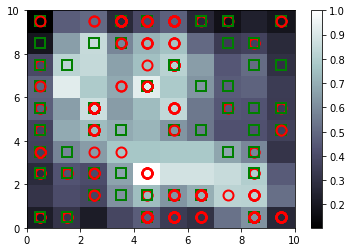

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,2)], mappings[(8,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [8]:
# Part 2 - Going from Unsupervised to Supervised Deep Learning

# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

In [9]:
# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [11]:
#Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


In [12]:
# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)

Epoch 1/5
690/690 [==============================] - 1s 2ms/step - loss: 0.4597 - acc: 0.9768
Epoch 2/5
690/690 [==============================] - 1s 2ms/step - loss: 0.1454 - acc: 0.9783
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.0996 - acc: 0.9783
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.0891 - acc: 0.9783
Epoch 5/5
690/690 [==============================] - 1s 2ms/step - loss: 0.0835 - acc: 0.9783


In [13]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [15]:
print(y_pred)

[[1.57997850e+07 3.65362612e-05]
 [1.56214230e+07 4.81891439e-05]
 [1.56548590e+07 2.44068229e-04]
 ...
 [1.56773950e+07 1.68363154e-01]
 [1.56927180e+07 1.80808455e-01]
 [1.57257760e+07 2.20805392e-01]]
